**Student name**: Andrea Lazzari<br>
**ID Number**: 2045247

# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.0


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2045247
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]

X, y = load_mnist("data")

print("Number of samples in the K-MNIST dataset:", X.shape[0])

# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("\nLabels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [52 68 70 72 63 57 50 52 52 64]

Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [410 412 409 424 388 417 382 363 387 408]


In [6]:
#function for plotting a image and printing the corresponding label

def plot_input(X_matrix, labels, index):
    print("\nINPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return


INPUT:


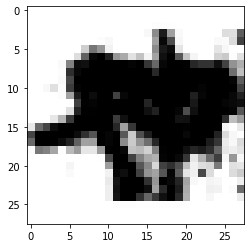

LABEL: 7

INPUT:


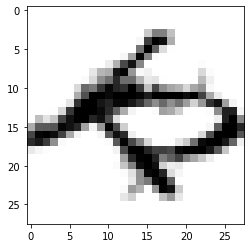

LABEL: 7

INPUT:


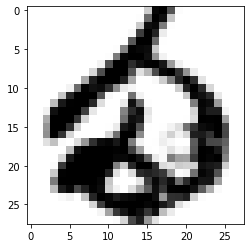

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, 
#try to experiment with different sizes!!

parameters = {'hidden_layer_sizes': [( 8 , ) , (16 , ), (27,), (40,), (47,) , (49,), (50,), (20,28,), (40,20,10) , (50,50,50) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

clf_mlp = GridSearchCV(mlp, parameters , cv=5)

clf_mlp.fit(X_train , y_train)


print ('RESULTS FOR NN\n')
clf_mlp_res =( pd.DataFrame.from_dict(clf_mlp.cv_results_))
print(clf_mlp_res)


print("\nBest parameters set found:")
print(clf_mlp.best_params_)

print("\nScore with best parameters:")
print(clf_mlp.best_score_)

print("\nAll scores on the grid:")
display(clf_mlp_res.loc[:,["params","mean_test_score"]])

/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perc

RESULTS FOR NN

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.589644      0.630638         0.001853        0.000468   
1       1.083007      0.253902         0.001800        0.000432   
2       1.132241      0.280389         0.001716        0.000837   
3       0.759121      0.034997         0.001666        0.000527   
4       0.678434      0.123129         0.001425        0.000089   
5       0.562470      0.009680         0.001370        0.000005   
6       0.591765      0.031649         0.001385        0.000007   
7       0.392813      0.049927         0.001227        0.000022   
8       0.635165      0.155902         0.001515        0.000213   
9       0.878528      0.364258         0.003598        0.002298   

  param_hidden_layer_sizes                                params  \
0                     (8,)          {'hidden_layer_sizes': (8,)}   
1                    (16,)         {'hidden_layer_sizes': (16,)}   
2                    (27,)         {'hidde

,params,mean_test_score
0,"{'hidden_layer_sizes': (8,)}",0.651667
1,"{'hidden_layer_sizes': (16,)}",0.718333
2,"{'hidden_layer_sizes': (27,)}",0.731667
3,"{'hidden_layer_sizes': (40,)}",0.751667
4,"{'hidden_layer_sizes': (47,)}",0.740000
5,"{'hidden_layer_sizes': (49,)}",0.720000
6,"{'hidden_layer_sizes': (50,)}",0.733333
7,"{'hidden_layer_sizes': (20, 28)}",0.710000
8,"{'hidden_layer_sizes': (40, 20, 10)}",0.701667
9,"{'hidden_layer_sizes': (50, 50, 50)}",0.746667


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!

parameters = {'batch_size': [1, 32, 40 , 64 , 128, 154 , 200 , 256, 400 , 450, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create 
#splits of different sizes
# recall to use cv=kf to use the k-fold subdivision seen in the lectures

kf = sklearn.model_selection.KFold(n_splits=5)

mlp_batch = MLPClassifier(hidden_layer_sizes = clf_mlp.best_params_['hidden_layer_sizes'],
                    max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, learning_rate_init=.1)


clf_mlp_batch = GridSearchCV(mlp_batch, parameters , cv=kf)


clf_mlp_batch.fit(X_train , y_train)


print ('RESULTS FOR NN\n')
clf_mlp_batch_res =( pd.DataFrame.from_dict(clf_mlp_batch.cv_results_))
print(clf_mlp_batch_res)

print("\nBest parameters set found:")
print(clf_mlp_batch.best_params_)

print("\nScore with best parameters:")
print(clf_mlp_batch.best_score_)

print("\nAll scores on the grid:")
display(clf_mlp_batch_res.loc[:,["params","mean_test_score"]])

/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perc

RESULTS FOR NN

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       42.734009     12.993926         0.001258        0.000012   
1        0.678861      0.082690         0.001294        0.000012   
2        0.647021      0.024151         0.001288        0.000005   
3        0.533546      0.022913         0.001354        0.000135   
4        0.568831      0.103048         0.001294        0.000011   
5        0.610926      0.076813         0.001294        0.000022   
6        0.556618      0.044118         0.001298        0.000008   
7        0.635376      0.091152         0.001393        0.000083   
8        0.657891      0.086616         0.001656        0.000546   
9        0.702729      0.022350         0.001335        0.000045   
10       0.759921      0.081278         0.001454        0.000154   

   param_batch_size               params  split0_test_score  \
0                 1    {'batch_size': 1}           0.050000   
1                32   {'batch_size': 32} 

,params,mean_test_score
0,{'batch_size': 1},0.098333
1,{'batch_size': 32},0.761667
2,{'batch_size': 40},0.753333
3,{'batch_size': 64},0.750000
4,{'batch_size': 128},0.741667
5,{'batch_size': 154},0.741667
6,{'batch_size': 200},0.735000
7,{'batch_size': 256},0.735000
8,{'batch_size': 400},0.736667
9,{'batch_size': 450},0.740000


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

For different architectures the results are really closed; the best one is the one with a signle layer with a big number of neurons in it despite a neural network with a multiple number of layer.
Regarding to this I suppose that the information from one layer to another is subjected to a sort of "compression".

For the batch sizes the results are similar apart from batch_size=1 because corresponds to an instability in the Gradiend Descent, with a "wrong"(or less correct) direction towards the minimum.
For this small batch size in fact the algorithm converges but with a really bad accuracy.

In fact small values of batch size give a learning process that converges quickly at the cost of noise in the training process whereas large values of batch size give a learning process that converges slowly with accurate estimates of the error gradient.

When the batch size is 480 the algorithm doesn't converge, because it slowly moves towards the minimum and 100 iterations are not enough.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (8,) ...


/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.99 sec

Training MLP of size (16,) ...
Done, training time: 0.90 sec

Training MLP of size (20, 28) ...
Done, training time: 0.63 sec

Training MLP of size (27,) ...
Done, training time: 0.76 sec

Training MLP of size (40,) ...
Done, training time: 1.00 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.76 sec

Training MLP of size (47,) ...
Done, training time: 1.02 sec

Training MLP of size (49,) ...
Done, training time: 1.02 sec

Training MLP of size (50,) ...
Done, training time: 1.48 sec

Training MLP of size (50, 50, 50) ...
Done, training time: 1.01 sec



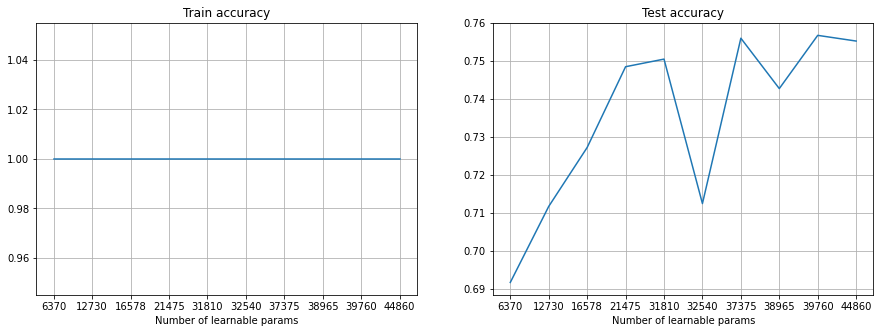

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [ (8 , ) ,(16 , ), (27,), (40,), (47,) , (49,), (50,), (20,28,), (40,20,10) , (50,50,50) ]

hl_labels = [param_count(t) for t in hl_sizes]

idx = np.argsort(hl_labels)

hl_sizes= np.array(hl_sizes , dtype=object)[idx]
hl_labels = np.array(hl_labels , dtype=object)[idx]



ti = time.time()
train_acc_list, test_acc_list = [], []

for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    
    mlp = MLPClassifier(hidden_layer_sizes = hl_size , max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, learning_rate_init=.1)
    
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

The training accuracy results flat to 1 probably due to the small numbers of training samples.

Regarding the test accuracy, it changes with respect to the various architecture that are tried
in addition to the changing in the number of learnable parameters.  

A simplistic architecture (for instance (8,) , (16,)) can lead to an underfitting case being so simple that can't afford dealing our dataset.
Instead a highly complex neural network (like (50,50,50)) can correspond to an overfitting, having more layers and weights than the number that is needed.
The best results are obtained by 1-layer high number of neurons so, I'm searching an architecture with this structure.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


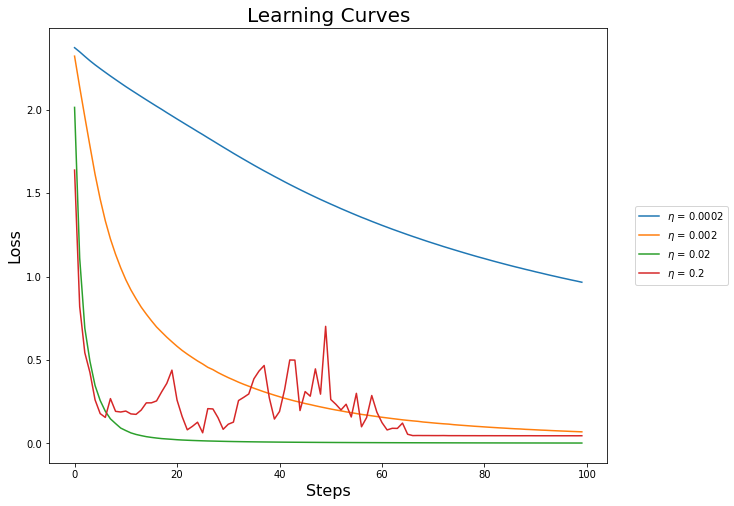

RESULTS FOR NN

Best parameters set found:
0.02
Score with best parameters:
0.75275


In [11]:
import matplotlib.pyplot as plt
import operator

plt.figure(figsize=(10,8))
lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}


for lr in lr_list:
    
    mlp = MLPClassifier( hidden_layer_sizes = clf_mlp.best_params_['hidden_layer_sizes'] , 
                              batch_size = clf_mlp_batch.best_params_['batch_size'] , max_iter=100, 
                              alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID ,
                              learning_rate_init=lr , n_iter_no_change=50)
    
    mlp.fit(X_train , y_train)
    
    scores[str(lr)] = mlp.score(X_test, y_test)

    plt.plot(mlp.loss_curve_, label='$\eta$ = '+str(lr) )
    

plt.legend(loc='center left' , bbox_to_anchor=(1.04, 0.5))
plt.title("Learning Curves" , fontsize=20)
plt.xlabel("Steps", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.show()


best_score = 0
best_lr = ""

for lr, score in scores.items():
    if score >= best_score :
        best_score = score
        best_lr = lr
        
        
print ('RESULTS FOR NN\n')


print("Best parameters set found:")
print(best_lr)

print("Score with best parameters:")
print(best_score)


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

The smallest learning rate $\eta = 0.0002$ (the blue curve) is really stable but it is slow in convergence.

The biggst learning rate $\eta = 0.2$ (the red curve) corresponds to a steep descent also due to the capacity to "exit" from the local minima encountered during the learing process. However, as a disadvantage it has a loss in terms of stability, in fact I had to increase the number of epochs waiting an improvement, to avoid the stop of the process with a really small number of steps. 

The best trade-off it is represented by the green curve, as it is found, from $\eta = 0.02$

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.246750


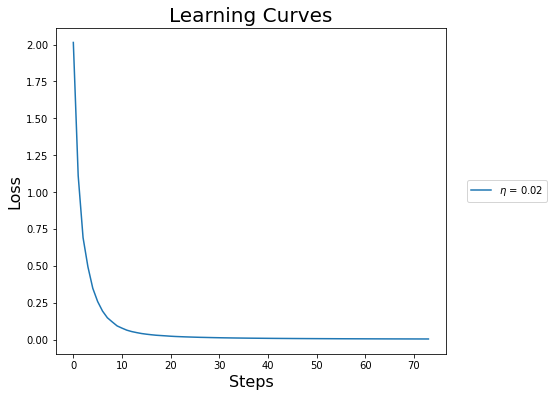

In [12]:
#get training and test error for the best NN model from CV

mlp = MLPClassifier(hidden_layer_sizes = clf_mlp.best_params_['hidden_layer_sizes'], 
                   batch_size = clf_mlp_batch.best_params_['batch_size'] , max_iter=500, 
                     alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID ,
                      learning_rate_init=float(best_lr))

mlp.fit(X_train, y_train)

training_error = 1 - mlp.score(X_train , y_train)
test_error= 1 - mlp.score(X_test, y_test)
plt.figure(figsize=(7,6))
plt.plot(mlp.loss_curve_, label='$\eta$ = '+str(best_lr))

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.legend(loc='center left' , bbox_to_anchor=(1.04, 0.5))
plt.title("Learning Curves" , fontsize=20)
plt.xlabel("Steps", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.show()


## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("\nLabels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [507 493 491 448 507 513 522 517 515 487]

Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [5493 5507 5509 5552 5493 5487 5478 5483 5485 5513]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [14]:
# use best architecture and params from before

best_mlp = MLPClassifier(hidden_layer_sizes = clf_mlp.best_params_['hidden_layer_sizes'], 
                   batch_size = clf_mlp_batch.best_params_['batch_size'] , max_iter=100, 
                     alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID ,
                      learning_rate_init=float(best_lr) , verbose=True)

best_mlp.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error = 1 - best_mlp.score(X_train , y_train)
test_error= 1 - best_mlp.score(X_test, y_test)


print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 0.97410479
Iteration 2, loss = 0.52008983
Iteration 3, loss = 0.38322014
Iteration 4, loss = 0.30589005
Iteration 5, loss = 0.24321664
Iteration 6, loss = 0.19794577
Iteration 7, loss = 0.15626984
Iteration 8, loss = 0.11702354
Iteration 9, loss = 0.09427124
Iteration 10, loss = 0.07236160
Iteration 11, loss = 0.05294218
Iteration 12, loss = 0.04186338
Iteration 13, loss = 0.03796972
Iteration 14, loss = 0.02661010
Iteration 15, loss = 0.02235001
Iteration 16, loss = 0.01770035
Iteration 17, loss = 0.01592012
Iteration 18, loss = 0.01364064
Iteration 19, loss = 0.01218167
Iteration 20, loss = 0.01093880
Iteration 21, loss = 0.01006151
Iteration 22, loss = 0.00918626
Iteration 23, loss = 0.00853142
Iteration 24, loss = 0.00798668
Iteration 25, loss = 0.00740489
Iteration 26, loss = 0.00707111
Iteration 27, loss = 0.00659075
Iteration 28, loss = 0.00630759
Iteration 29, loss = 0.00596585
Iteration 30, loss = 0.00569524
Iteration 31, loss = 0.00547606
Iteration 32, los

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

For both cases the training error is 0, whereas the test error gets better when it is computed with a bigger training set with m=5000 samples (vs m=600). Approximately in fact, in the second case it is the half of the other one. 

m $= 600 $ --> Test Error = $0.24675$

m $= 5000 $ --> Test Error = $0.13101$

This can regard to the fact that with a bigger training set, the algorithm learn how to classify correctly any "region" of data, having consequentially a better performance evaluating the test set.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=5000 training data points.

NN with m=5000 correctly classified

INPUT:


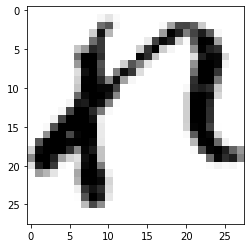

LABEL: 8

 
 NN with m=600 wrong classified (equal wrong label)

INPUT:


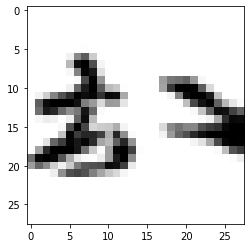

LABEL: 0


In [15]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = best_mlp.predict(X_test)

for i in range(len(X_test)):
    if (y_test[i] != NN_prediction[i] and y_test[i] == large_NN_prediction[i]):
        missclass_index=i
        break

        
print("NN with m=5000 correctly classified")       
plot_input(X_test,y_test, missclass_index)

index_wrong = 0
for j in range(len(X_test)):
    if (NN_prediction[missclass_index] == y_test[j]):
        index_wrong=j
        break
        
print("\n \n NN with m=600 wrong classified (equal wrong label)")
plot_input(X_test,y_test,index_wrong)


plt.show()
      

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


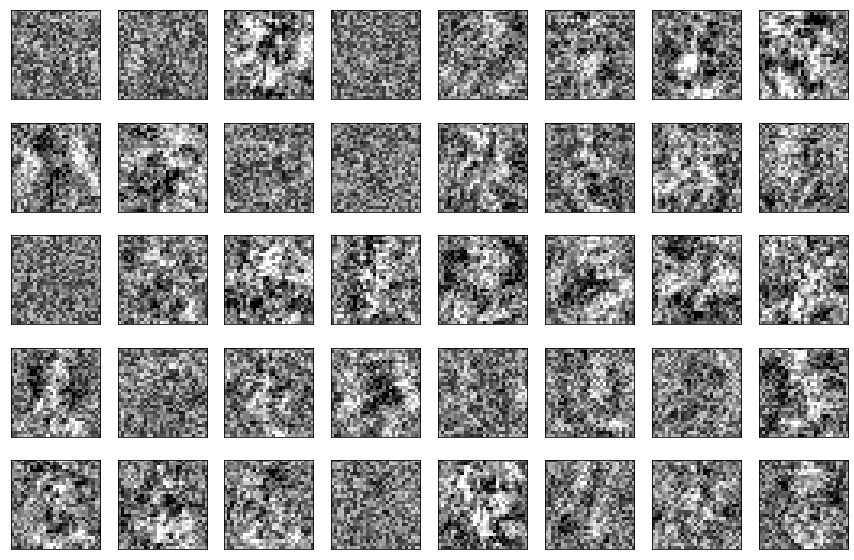


 
 Weights with 5000 data points:


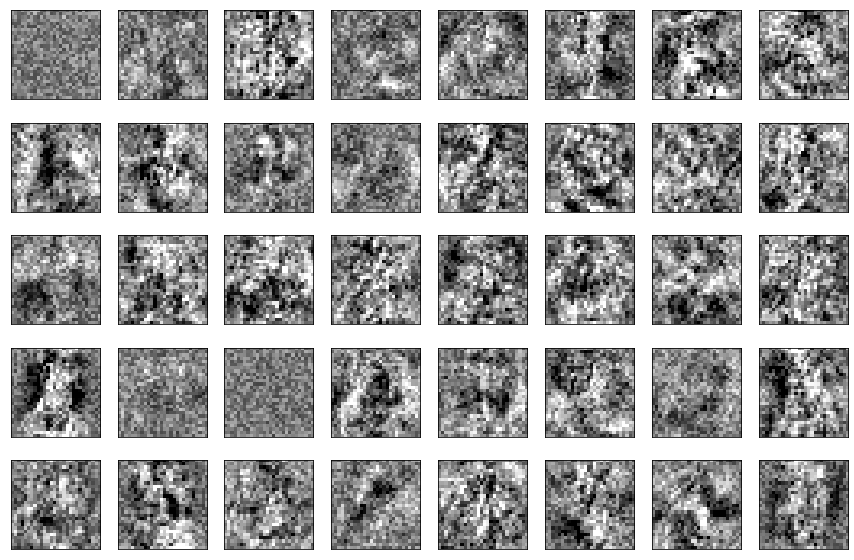

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(5, 8 , figsize=(15,10))
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("\n \n Weights with 5000 data points:")

fig, axes = plt.subplots(5, 8 , figsize=(15,10))
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

The results about the weights are very similar for the two cases where m=600 and m=5000, maybe with a little improvement on "smothness" in the second group of images, maybe because to a bigger number of training samples corresponds a better "definition" of the weights' values.

The black "pixels" that I have in this representation in greyscale indicate that the correspondent weights have a bigger value and as a consequence they are related to a more important information, they "carry" more information.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(kernel="rbf" , C = 10 , gamma = 0.01 )
best_SVM.fit(X_train, y_train)

training_error = 1 - best_SVM.score(X_train, y_train)
test_error     = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

print ('\nRESULTS FOR SVM')


SVM_training_error = 1 - training_error
print("\nTraining score SVM:")
print(SVM_training_error)


SVM_test_error = 1 - test_error
print("\nTest score SVM:")
print(SVM_test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.080509

RESULTS FOR SVM

Training score SVM:
1.0

Test score SVM:
0.9194909090909091


In [18]:
from sklearn import linear_model

training_error = 0
test_error = 0


regL2 = linear_model.LogisticRegression(C=1, max_iter = 1000).fit(X_train,y_train)



training_error = 1 - regL2.score(X_train,y_train)
test_error = 1 - regL2.score(X_test, y_test)
        
        
print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')


print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.027000
Test error (reg): 0.241145


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

|                | NN    | SVM   | LR    |   |
|----------------|-------|-------|-------|---|
| Training Error | 0.0   | 0.0   | 0.027 |   |
| Test Error     | 0.131 | 0.080 | 0.241 |   |
|                |       |       |       |   |


The linear regression works worse than SVM and Neural Networks with a test error that is around 5 or 6 times the SVM one and the double of the test error of NN.

The behaviours of SVM and the NN are really similar in solving this specific problem of classification, but with a slightly better performance in favor of the SVM.

The differences in performance between SVM and Neural Networks come out when the tasks to solve are more complex, in this problem both achieve good results also regarding computational time.